# Data import and cleaning

In [1]:
# Import required packages
# !pip install pystan
# conda install -c conda-forge fbprophet
# conda update -n base -c defaults conda
# !pip install fbprophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from fbprophet import Prophet
import warnings 
import itertools
warnings.filterwarnings('ignore')
import pystan



In [2]:
# Read the dataset
df_ilu = pd.read_csv('data/ILULISSAT1.txt',delimiter= '\s+', header=None)
df_ilu.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1824,-161,-196,-160,-59,15,57,81,42,7,-57,-90,-126
1,1825,-999,-999,-999,-999,-999,-999,54,-999,-999,-63,-136,-180
2,1826,-184,-999,-204,-234,-31,-6,-999,-999,6,-51,-60,-118
3,1827,-186,-74,-197,-105,-22,-999,-999,-999,-999,-999,-999,-999
4,1828,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [3]:
# Change column names
df_ilu.columns = ['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [4]:
df_ilu = df_ilu.replace(-999, np.nan)

In [5]:
df_ilu[df_ilu.Jan.isna()==True]

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1,1825,NaN,NaN,NaN,NaN,NaN,NaN,54.0,NaN,NaN,-63.0,-136.0,-180.0
4,1828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-39.0,-52.0,-108.0
28,1852,NaN,NaN,NaN,NaN,NaN,54.0,74.0,NaN,17.0,-25.0,-76.0,-113.0


In [6]:
# df_ilu_long['Temp'] = df_ilu_long.Temp.fillna(df_ilu_long.Temp.rolling(4,min_periods=1).mean())
for i in df_ilu.columns:
    df_ilu[i] = df_ilu[i].fillna(df_ilu[i].rolling(6, min_periods=1).mean())
    
for i in df_ilu.columns:
    df_ilu[i] = df_ilu[i].fillna(df_ilu[i].rolling(6, min_periods=1).mean())

In [7]:
df_ilu.head(40)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1824,-161.0,-196.0,-160.0,-59.000000,15.000000,57.000000,81.000,42.00,7.000000,-57.0,-90.000000,-126.000000
1,1825,-161.0,-196.0,-160.0,-59.000000,15.000000,57.000000,54.000,42.00,7.000000,-63.0,-136.000000,-180.000000
2,1826,-184.0,-196.0,-204.0,-234.000000,-31.000000,-6.000000,67.500,42.00,6.000000,-51.0,-60.000000,-118.000000
3,1827,-186.0,-74.0,-197.0,-105.000000,-22.000000,25.500000,67.500,42.00,6.500000,-57.0,-95.333333,-141.333333
4,1828,-177.0,-135.0,-187.0,-132.666667,-12.666667,25.500000,67.500,42.00,6.500000,-57.0,-95.333333,-141.333333
5,1829,-177.0,-135.0,-187.0,-132.666667,-12.666667,25.500000,67.500,42.00,6.500000,-39.0,-52.000000,-108.000000
6,1830,-71.0,-158.0,-184.0,-78.000000,-26.500000,-6.000000,54.000,42.00,29.000000,-50.0,-107.000000,-129.000000
7,1831,-121.0,-153.0,-155.0,-54.000000,19.000000,-6.000000,64.800,42.00,17.500000,-82.0,-99.000000,-97.000000
8,1832,-187.0,-252.0,-288.0,-108.000000,-1.500000,12.900000,64.125,42.00,29.000000,-80.0,-138.000000,-248.000000
9,1833,-210.0,-207.0,-124.0,-76.000000,19.000000,9.750000,63.000,61.00,11.000000,-71.0,-133.000000,-226.000000


In [8]:
df_ilu.isna().sum()

Year    0
Jan     0
Feb     0
Mar     0
Apr     0
May     0
Jun     0
Jul     0
Aug     0
Sep     0
Oct     0
Nov     0
Dec     0
dtype: int64

In [9]:
# Convert wide to long
df_ilu_long = pd.melt(df_ilu, id_vars='Year', value_vars=('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'))

In [10]:
df_ilu_long.head(10)

,Year,variable,value
0,1824,Jan,-161.0
1,1825,Jan,-161.0
2,1826,Jan,-184.0
3,1827,Jan,-186.0
4,1828,Jan,-177.0
5,1829,Jan,-177.0
6,1830,Jan,-71.0
7,1831,Jan,-121.0
8,1832,Jan,-187.0
9,1833,Jan,-210.0


In [11]:
df_ilu_long['Date'] = df_ilu_long['variable'].astype(str) + '/1/' + df_ilu_long['Year'].astype(str)


INFO:numexpr.utils:Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [12]:
df_ilu_long.index

RangeIndex(start=0, stop=2280, step=1)

In [13]:
df_ilu_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2280 entries, 0 to 2279
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      2280 non-null   int64  
 1   variable  2280 non-null   object 
 2   value     2280 non-null   float64
 3   Date      2280 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 71.4+ KB


In [14]:
df_ilu_long['Date'] = df_ilu_long['Date'].astype('datetime64[ns]')

In [15]:
df_ilu_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2280 entries, 0 to 2279
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Year      2280 non-null   int64         
 1   variable  2280 non-null   object        
 2   value     2280 non-null   float64       
 3   Date      2280 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 71.4+ KB


In [16]:
#df_ilu_long.set_index(df_ilu_long['Date'], inplace=True)

In [17]:
df_ilu_long.head(10)

,Year,variable,value,Date
0,1824,Jan,-161.0,1824-01-01
1,1825,Jan,-161.0,1825-01-01
2,1826,Jan,-184.0,1826-01-01
3,1827,Jan,-186.0,1827-01-01
4,1828,Jan,-177.0,1828-01-01
5,1829,Jan,-177.0,1829-01-01
6,1830,Jan,-71.0,1830-01-01
7,1831,Jan,-121.0,1831-01-01
8,1832,Jan,-187.0,1832-01-01
9,1833,Jan,-210.0,1833-01-01


In [18]:
df_ilu_long.columns = [ 'Year', 'Month', 'Temp', 'Date']

In [19]:
df_ilu_long.head(10)

,Year,Month,Temp,Date
0,1824,Jan,-161.0,1824-01-01
1,1825,Jan,-161.0,1825-01-01
2,1826,Jan,-184.0,1826-01-01
3,1827,Jan,-186.0,1827-01-01
4,1828,Jan,-177.0,1828-01-01
5,1829,Jan,-177.0,1829-01-01
6,1830,Jan,-71.0,1830-01-01
7,1831,Jan,-121.0,1831-01-01
8,1832,Jan,-187.0,1832-01-01
9,1833,Jan,-210.0,1833-01-01


In [20]:
#df_ilu_long = df_ilu_long.replace(-999, np.nan) #no need


In [21]:
#df_ilu_long['Temp'] = ""
for i in range(0, len(df_ilu_long)):
    df_ilu_long['Temp'][i] = df_ilu_long['Temp'][i]/10

In [22]:
df_ilu_long.head(-40)

,Year,Month,Temp,Date
0,1824,Jan,-16.1,1824-01-01
1,1825,Jan,-16.1,1825-01-01
2,1826,Jan,-18.4,1826-01-01
3,1827,Jan,-18.6,1827-01-01
4,1828,Jan,-17.7,1828-01-01
...,...,...,...,...
2235,1969,Dec,-12.7,1969-12-01
2236,1970,Dec,-10.8,1970-12-01
2237,1971,Dec,-21.7,1971-12-01
2238,1972,Dec,-13.5,1972-12-01


In [23]:
df_ilu_long.set_index(df_ilu_long['Date'], inplace=True)

In [24]:
df_ilu_long.index.names = ['Time']

In [25]:
df_ilu_long = df_ilu_long.sort_values(by='Date',ascending=True)

In [26]:
df_ilu_long['Temp'].describe()

count    2280.000000
mean       -5.102855
std         9.076289
min       -32.100000
25%       -12.100000
50%        -5.100000
75%         3.100000
max        11.000000
Name: Temp, dtype: float64

# EDA 

In [27]:
jan =  df_ilu['Jan']/10
feb =  df_ilu['Feb']/10
mar =  df_ilu['Mar']/10
apr =  df_ilu['Apr']/10
may =  df_ilu['May']/10
jun =  df_ilu['Jun']/10
jul =  df_ilu['Jul']/10
aug =  df_ilu['Aug']/10
sep =  df_ilu['Sep']/10
oct =  df_ilu['Oct']/10
nov =  df_ilu['Nov']/10
dec =  df_ilu['Dec']/10

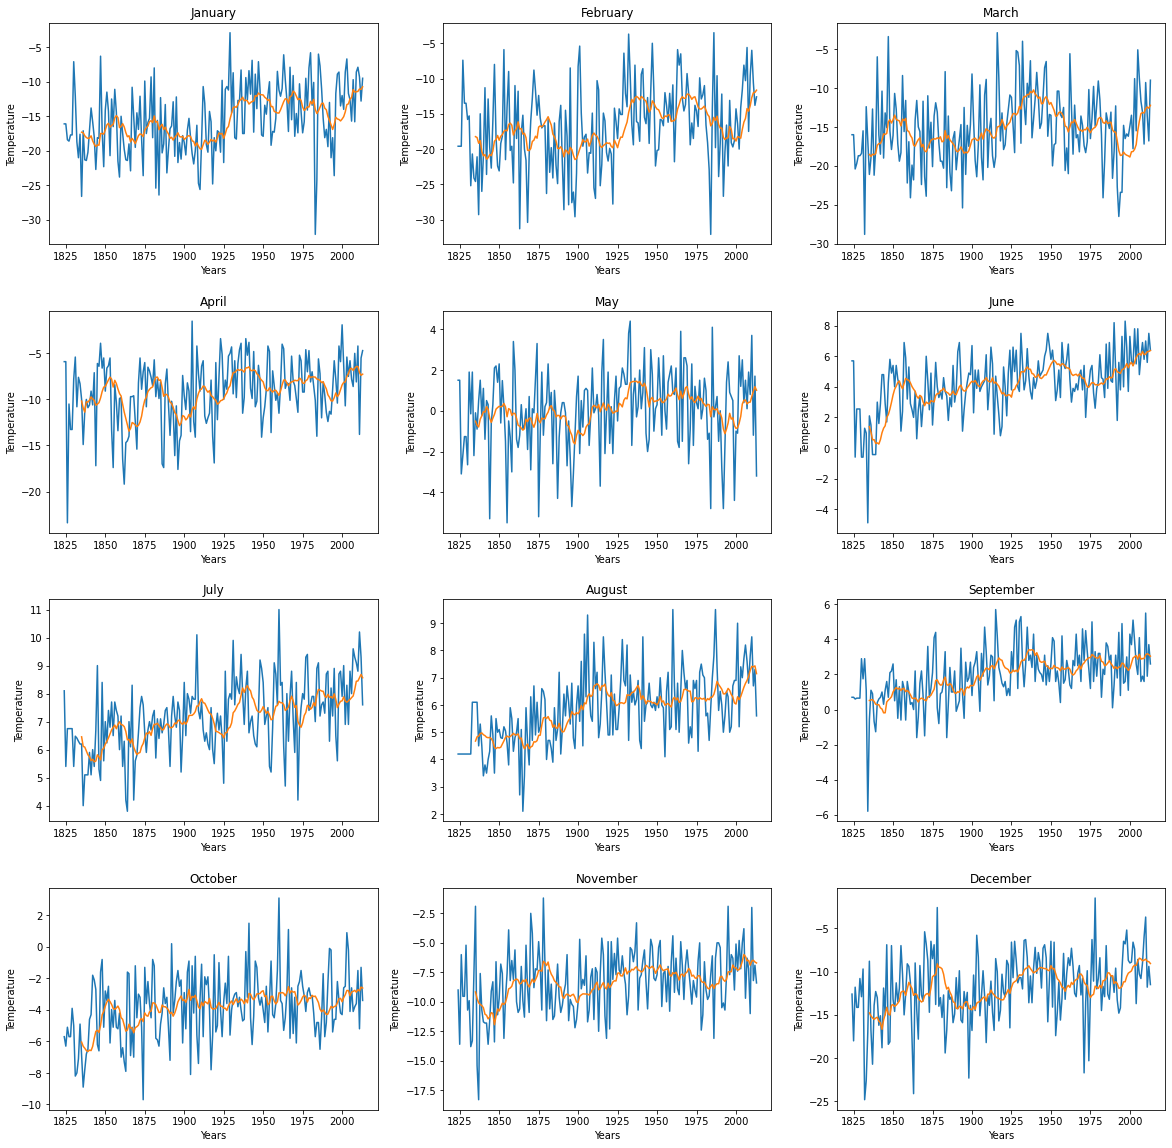

In [28]:
#x = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
fig, axs = plt.subplots(4, 3)

fig.set_figheight(20)
fig.set_figwidth(20)
fig.subplots_adjust(hspace=.3)


axs[0, 0].plot(df_ilu['Year'], jan)
axs[0, 0].set_title('January')
jan_moving_average = jan.rolling(window=12).mean()
axs[0, 0].plot(df_ilu['Year'], jan_moving_average)

axs[0, 1].plot(df_ilu['Year'], feb)
axs[0, 1].set_title('February')
feb_moving_average = feb.rolling(window=12).mean()
axs[0, 1].plot(df_ilu['Year'], feb_moving_average)

axs[0, 2].plot(df_ilu['Year'], mar)
axs[0, 2].set_title('March')
mar_moving_average = mar.rolling(window=12).mean()
axs[0, 2].plot(df_ilu['Year'], mar_moving_average)

axs[1, 0].plot(df_ilu['Year'], apr)
axs[1, 0].set_title('April')
apr_moving_average = apr.rolling(window=12).mean()
axs[1, 0].plot(df_ilu['Year'], apr_moving_average)

axs[1, 1].plot(df_ilu['Year'], may)
axs[1, 1].set_title('May')
may_moving_average = may.rolling(window=12).mean()
axs[1, 1].plot(df_ilu['Year'], may_moving_average)

axs[1, 2].plot(df_ilu['Year'], jun)
axs[1, 2].set_title('June')
jun_moving_average = jun.rolling(window=12).mean()
axs[1, 2].plot(df_ilu['Year'], jun_moving_average)

axs[2, 0].plot(df_ilu['Year'], jul)
axs[2, 0].set_title('July')
jul_moving_average = jul.rolling(window=12).mean()
axs[2, 0].plot(df_ilu['Year'], jul_moving_average)

axs[2, 1].plot(df_ilu['Year'], aug)
axs[2, 1].set_title('August')
aug_moving_average = aug.rolling(window=12).mean()
axs[2, 1].plot(df_ilu['Year'], aug_moving_average)

axs[2, 2].plot(df_ilu['Year'], sep)
axs[2, 2].set_title('September')
sep_moving_average = sep.rolling(window=12).mean()
axs[2, 2].plot(df_ilu['Year'], sep_moving_average)

axs[3, 0].plot(df_ilu['Year'], oct)
axs[3, 0].set_title('October')
oct_moving_average = oct.rolling(window=12).mean()
axs[3, 0].plot(df_ilu['Year'], oct_moving_average)

axs[3, 1].plot(df_ilu['Year'], nov)
axs[3, 1].set_title('November')
nov_moving_average = nov.rolling(window=12).mean()
axs[3, 1].plot(df_ilu['Year'], nov_moving_average)

axs[3, 2].plot(df_ilu['Year'], dec)
axs[3, 2].set_title('December')
dec_moving_average = dec.rolling(window=12).mean()
axs[3, 2].plot(df_ilu['Year'], dec_moving_average)


for ax in axs.flat:
    ax.set(xlabel='Years', ylabel='Temperature')

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
#    ax.label_outer()# Divide by 10 and add a 5 year running average line


In [29]:
df_ilu.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1824,-161.0,-196.0,-160.0,-59.000000,15.000000,57.0,81.0,42.0,7.0,-57.0,-90.000000,-126.000000
1,1825,-161.0,-196.0,-160.0,-59.000000,15.000000,57.0,54.0,42.0,7.0,-63.0,-136.000000,-180.000000
2,1826,-184.0,-196.0,-204.0,-234.000000,-31.000000,-6.0,67.5,42.0,6.0,-51.0,-60.000000,-118.000000
3,1827,-186.0,-74.0,-197.0,-105.000000,-22.000000,25.5,67.5,42.0,6.5,-57.0,-95.333333,-141.333333
4,1828,-177.0,-135.0,-187.0,-132.666667,-12.666667,25.5,67.5,42.0,6.5,-57.0,-95.333333,-141.333333


In [30]:
df_ilu.columns

Index(['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'],
      dtype='object')

In [31]:
df_ilu_long.size

9120

In [32]:
df_ilu_long.head()

,Year,Month,Temp,Date
Time,,,,
1824-01-01,1824,Jan,-16.1,1824-01-01
1824-02-01,1824,Feb,-19.6,1824-02-01
1824-03-01,1824,Mar,-16.0,1824-03-01
1824-04-01,1824,Apr,-5.9,1824-04-01
1824-05-01,1824,May,1.5,1824-05-01


In [33]:
df = df_ilu_long.iloc[:, [0,3]]

In [34]:
df_ilu_long['Temp'] = df_ilu_long.Temp.fillna(df_ilu_long.Temp.rolling(4,min_periods=1).mean())

In [35]:
df_ilu_long.describe()

,Year,Temp
count,2280.000000,2280.000000
mean,1918.500000,-5.102855
std,54.859548,9.076289
min,1824.000000,-32.100000
25%,1871.000000,-12.100000
50%,1918.500000,-5.100000
75%,1966.000000,3.100000
max,2013.000000,11.000000


In [36]:
df_ilu_long.head(5)

,Year,Month,Temp,Date
Time,,,,
1824-01-01,1824,Jan,-16.1,1824-01-01
1824-02-01,1824,Feb,-19.6,1824-02-01
1824-03-01,1824,Mar,-16.0,1824-03-01
1824-04-01,1824,Apr,-5.9,1824-04-01
1824-05-01,1824,May,1.5,1824-05-01


In [37]:
type(df_ilu_long)

pandas.core.frame.DataFrame

In [38]:
data = df_ilu_long['Temp']

In [39]:
type(data)

pandas.core.series.Series

In [40]:
data.head(5)

Time
1824-01-01   -16.1
1824-02-01   -19.6
1824-03-01   -16.0
1824-04-01    -5.9
1824-05-01     1.5
Name: Temp, dtype: float64

In [41]:
train = data[:1823]
test = data[1823:]

In [42]:
data.head()

Time
1824-01-01   -16.1
1824-02-01   -19.6
1824-03-01   -16.0
1824-04-01    -5.9
1824-05-01     1.5
Name: Temp, dtype: float64

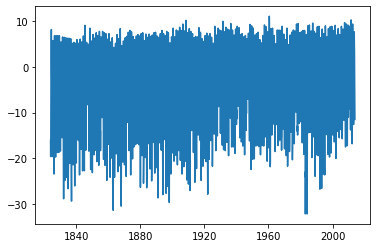

In [43]:
plt.plot(df_ilu_long.index.values, df_ilu_long['Temp'])

In [44]:
temp_moving_average = df_ilu_long.Temp.rolling(window=120).mean()

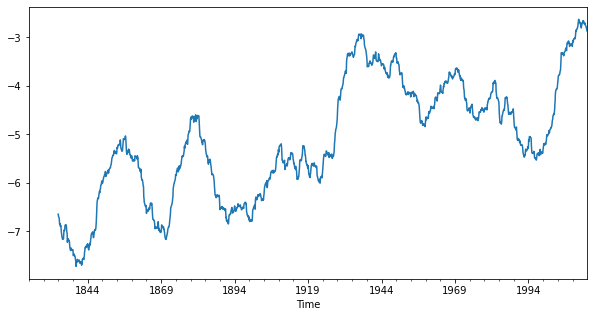

In [45]:
temp_moving_average.plot(figsize=(10, 5))

In [46]:
temp_moving_median = df_ilu_long.Temp.rolling(window=120).median()

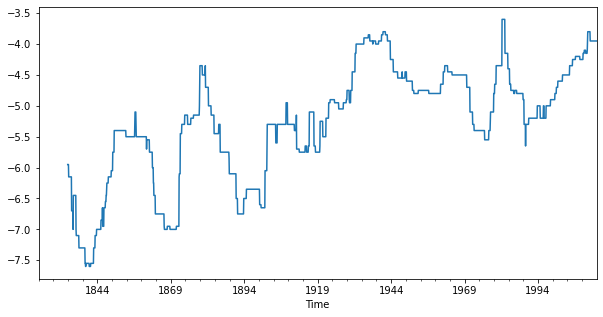

In [47]:
temp_moving_median.plot(figsize=(10, 5))

# Modeling

### Baseline Model

In [48]:
df_ilu_long.reset_index(inplace=True)

In [49]:
series_value = df_ilu_long['Temp']

In [50]:
series_value

0      -16.1
1      -19.6
2      -16.0
3       -5.9
4        1.5
        ... 
2275     5.6
2276     2.6
2277    -3.4
2278    -8.4
2279   -11.5
Name: Temp, Length: 2280, dtype: float64

In [51]:
value = pd.DataFrame(series_value)

In [52]:
shifted = pd.concat([value, value.shift(1)], axis=1)

In [53]:
shifted.head()

,Temp,Temp
0,-16.1,NaN
1,-19.6,-16.1
2,-16.0,-19.6
3,-5.9,-16.0
4,1.5,-5.9


In [54]:
shifted.columns = ['temperature', 'forecast']

In [55]:
temp_test = shifted[1:]

In [56]:
temp_test.head()

,temperature,forecast
1,-19.6,-16.1
2,-16.0,-19.6
3,-5.9,-16.0
4,1.5,-5.9
5,5.7,1.5


In [57]:
temp_error = np.sqrt(mean_squared_error(temp_test.temperature, temp_test.forecast))

In [58]:
# RMSE:
temp_error

5.762650705876562

### ARIMA - Auto Regressive (p) Integrated (d) Moving Averages (q)

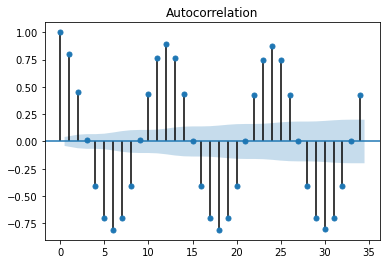

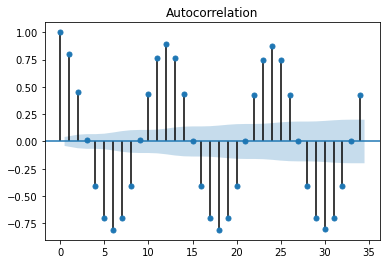

In [59]:
# Arima(p,d,q)
# Plot_acf will be used to identify the q
# d is the number we are going to give for correlation between months
plot_acf(temp_test.temperature)


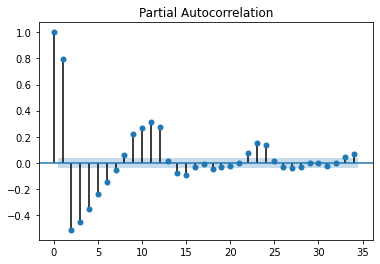

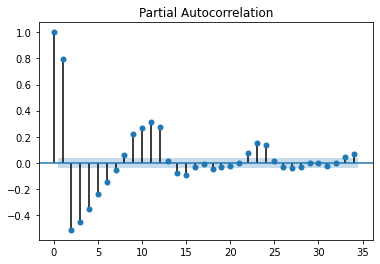

In [60]:
# To identufy the value of p
plot_pacf(temp_test.temperature)

In [61]:
# p= 2,3  d=0,1    q=2,3,4
#train, test = train_test_split(temp_test.temperature, test_size=0.2)

#train = temp_test['temperature'][:1823]
#test = temp_test['temperature'][1823:]

In [62]:
len(test)

457

In [63]:
len(train)

1823

In [64]:
test.tail()

Time
2013-08-01     5.6
2013-09-01     2.6
2013-10-01    -3.4
2013-11-01    -8.4
2013-12-01   -11.5
Name: Temp, dtype: float64

In [65]:
p=d=q=range(0, 5)
pdq = list(itertools.product(p,d,q))

In [66]:

for param in pdq:
    try:
        temp_model = ARIMA(train, order=param)
        temp_model_fit = temp_model.fit()
        print(param, temp_model_fit.aic)
    except:
        continue

(0, 0, 0) 13235.036623322012
(0, 0, 1) 11896.058340580072
(0, 0, 2) 11307.717731568227
(0, 0, 3) 10988.17056290108
(0, 0, 4) 10851.78037807413
(0, 1, 0) 11581.43806064148
(0, 1, 1) 11410.740651911257
(0, 1, 2) 11297.193364398705
(0, 1, 3) 11240.971094111412
(0, 1, 4) 11236.838207933335
(0, 2, 0) 12050.655424423672
(0, 2, 1) 11726.757385383855
(0, 2, 2) 11719.458060760266
(0, 2, 3) 11300.659331970532
(0, 2, 4) 11244.124158918095
(1, 0, 0) 11395.962875062645
(1, 0, 1) 11145.156652035312
(1, 0, 2) 10971.141042516927
(1, 0, 3) 11293.384398549832
(1, 0, 4) 10944.569923923493
(1, 1, 0) 11344.298839117695
(1, 2, 0) 11721.089360393062
(2, 0, 0) 10866.245077219683
(2, 0, 2) 9758.916217600956
(2, 0, 3) 9511.941866056299
(2, 0, 4) 9473.783218247183
(2, 1, 0) 11318.198585981758
(2, 1, 3) 9556.81357204769
(2, 1, 4) 9419.602499571127
(2, 2, 0) 11714.63330537899
(3, 0, 0) 10417.79500486952
(3, 0, 2) 9462.198529458794
(3, 0, 3) 9464.29561082767
(3, 0, 4) 9457.2116658506
(3, 1, 0) 11268.104881431274
(3

In [67]:
train.head()

Time
1824-01-01   -16.1
1824-02-01   -19.6
1824-03-01   -16.0
1824-04-01    -5.9
1824-05-01     1.5
Name: Temp, dtype: float64

In [68]:
temp_model = ARIMA(train, order=(3,1,4))
temp_model_fit = temp_model.fit()
print('AIC = ',temp_model_fit.aic)
temp_forecast = temp_model_fit.forecast(steps=457)[0]
print('ARIMA RMSE = ',np.sqrt(mean_squared_error(test, temp_forecast)))

AIC =  9411.378020150167
ARIMA RMSE =  3.6538495814733234


In [69]:
print(temp_model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Temp   No. Observations:                 1822
Model:                 ARIMA(3, 1, 4)   Log Likelihood               -4696.689
Method:                       css-mle   S.D. of innovations              3.179
Date:                Tue, 16 Feb 2021   AIC                           9411.378
Time:                        22:46:47   BIC                           9460.947
Sample:                    02-01-1824   HQIC                          9429.665
                         - 11-01-1975                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0010      0.002      0.530      0.596      -0.003       0.005
ar.L1.D.Temp     1.8348        nan        nan        nan         nan         nan
ar.L2.D.Temp    -1.1783        nan        na

### Exponential Smoothing

#### Triple Exponential Smoothing (Seasonality and Halt Winters)

In [70]:
# When seasonal='mul' gives error for using negative values

#train_yhat = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12).fit().fittedvalues


In [71]:
# When seasonal='mul' gives error for using negative values

model = ExponentialSmoothing (train, trend='add', seasonal='add', seasonal_periods=12)
fitted = model.fit()
#.fittedvalues
#forecast = model_fit.forecast(steps=457)[0]
forecast = fitted.forecast(steps=457)


In [72]:
print(fitted.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                 1823
Model:             ExponentialSmoothing   SSE                          17571.232
Optimized:                         True   AIC                           4162.516
Trend:                         Additive   BIC                           4250.648
Seasonal:                      Additive   AICC                          4162.895
Seasonal Periods:                    12   Date:                 Tue, 16 Feb 2021
Box-Cox:                          False   Time:                         22:47:07
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.1417214                alpha                 True
smoothing_slope          

In [73]:
len(forecast)

457

In [74]:
#make prediction on test data
#forecast = model_fit.forecast(steps=457)[0]

In [75]:
print('Halt Winters RMSE = ', np.sqrt(mean_squared_error(test, forecast)))

Halt Winters RMSE =  3.4193666994031324


### FBProphet

In [82]:
data = df_ilu_long[['Date', 'Temp']]

In [83]:
data.columns = ['ds', 'y']

In [84]:
train = data[:1823]
test = data[1823:]

In [85]:
len(train)

1823

In [86]:
len(test)

457

In [79]:


#train.columns = ['ds', 'y']dd

In [87]:
type(train)

pandas.core.frame.DataFrame

In [88]:
train.head()

,ds,y
0,1824-01-01,-16.1
1,1824-02-01,-19.6
2,1824-03-01,-16.0
3,1824-04-01,-5.9
4,1824-05-01,1.5


In [119]:
#interval_width=[ 0.8, 0.95] # Float, width of the uncertainty intervals provided
changepoint_prior_scale = [ 0.03] #Parameter modulating the flexibility of the automatic changepoint selection
#yearly_seasonality= [True ]
seasonality_mode=['additive']

#n_changepoints= [13, 25, 45] #Number of potential changepoints to include.
#changepoint_range= [0.8, 0.95]   # Proportion of history in which trend changepoints will be estimated.
seasonality_prior_scale=[0.1] # Parameter modulating the strength of the seasonality model

#n_changepoints=nc  
#changepoint_range=cr,
#seasonality_prior_scale=spc,
# 

for iw in interval_width:
    for cps in changepoint_prior_scale:
        for ys in yearly_seasonality:
            for sm in seasonality_mode:
                for nc in n_changepoints:
                    for cr in changepoint_range:
                        for spc in seasonality_prior_scale:
                            
                            model=Prophet(seasonality_mode=sm, seasonality_prior_scale=spc, changepoint_prior_scale=cps,   daily_seasonality=False, weekly_seasonality=False,  holidays=None )
                            model.fit(train)
                            future = model.make_future_dataframe(periods=457, freq='MS')
                            forecast = model.predict(future)
                            #se = np.square(forecast.loc[:, 'yhat'] - test['y'])
                            #mse = np.mean(se)
                            RMSE =  np.sqrt(mean_squared_error(test['y'], forecast['yhat'][1823:]))
                            print('cps:',cps, 'sm:',sm,'spc:',spc, ' RMSE: ' , RMSE)


# Initialize the Model
#model=Prophet(interval_width=0.95, daily_seasonality=False, weekly_seasonality=False, yearly_seasonality=True, changepoint_prior_scale=0.095,  holidays=None )
#model = Prophet(seasonality_mode='multiplicative')

#iw: 0.07 cps: 5 ys: True sm: multiplicative nc: 2256 cr: 0.99 spc: 0.1  RMSE:  2.9505002115512107
#iw: 0.07 cps: 5 ys: True sm: multiplicative nc: 200 cr: 0.99 spc: 0.1  RMSE:  2.956579842514606

cps: 0.03 sm: additive spc: 0.1  RMSE:  3.3321033955557495
cps: 0.03 sm: additive spc: 0.1  RMSE:  3.3321033955557495
cps: 0.03 sm: additive spc: 0.1  RMSE:  3.3321033955557495
cps: 0.03 sm: additive spc: 0.1  RMSE:  3.3321033955557495
cps: 0.03 sm: additive spc: 0.1  RMSE:  3.3321033955557495
cps: 0.03 sm: additive spc: 0.1  RMSE:  3.3321033955557495
cps: 0.03 sm: additive spc: 0.1  RMSE:  3.3321033955557495
cps: 0.03 sm: additive spc: 0.1  RMSE:  3.3321033955557495


KeyboardInterrupt: 

In [ ]:
se = np.square(forecast.loc[:, 'yhat'] - df['y'])
mse = np.mean(se)
rmse = np.sqrt(mse)
print(rmse)

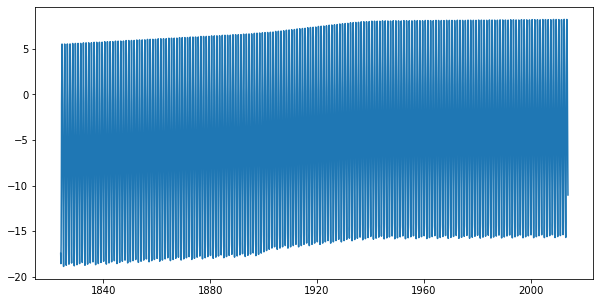

In [124]:
plt.figure(figsize=(10,5))
plt.plot(forecast['ds'], forecast['yhat'])

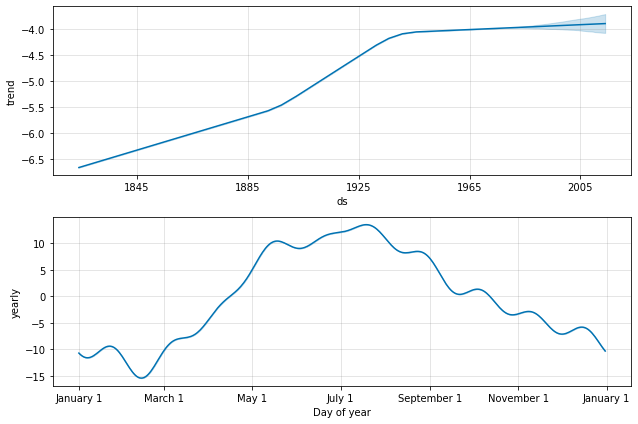

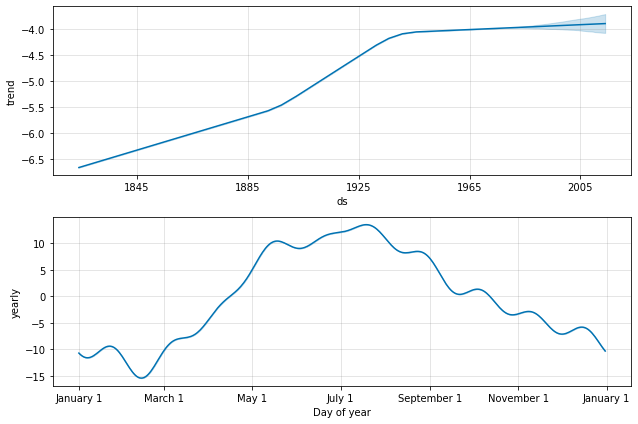

In [121]:
model.plot_components(forecast)

In [ ]:
forecast.head()

In [ ]:
help(Prophet)

In [90]:
len(forecast)

2280

In [91]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1824-01-01,-5.555306,-16.867137,-15.909947,-5.555306,-5.555306,-10.811034,-10.811034,-10.811034,-10.811034,-10.811034,-10.811034,0.0,0.0,0.0,-16.366340
1,1824-02-01,-5.573679,-17.894702,-16.949071,-5.573679,-5.573679,-11.917823,-11.917823,-11.917823,-11.917823,-11.917823,-11.917823,0.0,0.0,0.0,-17.491502
2,1824-03-01,-5.590866,-15.878941,-14.946972,-5.590866,-5.590866,-9.760227,-9.760227,-9.760227,-9.760227,-9.760227,-9.760227,0.0,0.0,0.0,-15.351093
3,1824-04-01,-5.609239,-9.949099,-8.907249,-5.609239,-5.609239,-3.848849,-3.848849,-3.848849,-3.848849,-3.848849,-3.848849,0.0,0.0,0.0,-9.458088
4,1824-05-01,-5.627019,-0.342711,0.599929,-5.627019,-5.627019,5.708567,5.708567,5.708567,5.708567,5.708567,5.708567,0.0,0.0,0.0,0.081548


In [98]:
forecast['yhat'].tail()

2275     1.037298
2276    -2.832253
2277    -8.699480
2278   -13.270515
2279   -17.128354
Name: yhat, dtype: float64